Shaquille O'Neal - 7 ft 1 in
Son - 6 ft 7 in

Galton called this phenomenon regression, as in "A father's
son's height tends to regress (or drift towards) the mean (average) height.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [3]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


<AxesSubplot:xlabel='Price', ylabel='Avg. Area Income'>

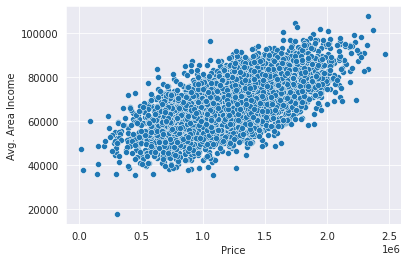

In [48]:
sns.scatterplot(x='Price',y='Avg. Area Income',data=df)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
X = df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
y = df['Price']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [17]:
X_train.shape

(3000, 5)

In [20]:
X_test.shape

(2000, 5)

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train,y_train)

LinearRegression()

In [24]:
lm.intercept_

-2642239.2512348383

In [25]:
lm.coef_

array([2.15704132e+01, 1.66552478e+05, 1.19512534e+05, 2.75895188e+03,
       1.52968610e+01])

In [28]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

,Coeff
Avg. Area Income,21.570413
Avg. Area House Age,166552.477670
Avg. Area Number of Rooms,119512.534382
Avg. Area Number of Bedrooms,2758.951878
Area Population,15.296861


### Predictions

In [43]:
pred = lm.predict(X_test)

In [44]:
y_test

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
            ...     
331     9.967712e+05
3100    1.146480e+06
1454    7.769063e+05
342     1.123851e+06
3209    9.870041e+05
Name: Price, Length: 2000, dtype: float64

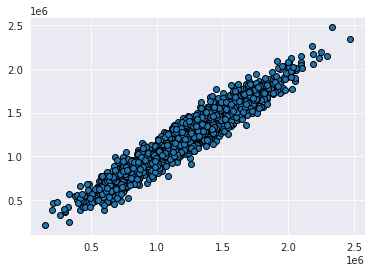

In [52]:
plt.scatter(y_test,pred,ec='black')

Looks good (diagonally straight)

<AxesSubplot:xlabel='Price', ylabel='Count'>

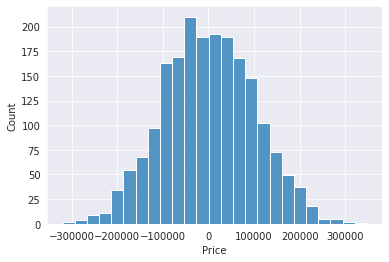

In [58]:
sns.histplot(y_test-pred,bins=25)

Looks good. Centered around 0 which is the residual

** Loss functions **

- Mean Absolute Error (MAE) - mean of the absolute value of errors
- Mean Squared Error (MSE) - mean of the squared errors
will punish larger errors
;more useful in the real world since it's punishing larger errors (due to squaring)
- Root Mean Squared Error (RMSE) - is the square root of the mean of the squared errors
 more popular that MSE because they RMSE is interpretable in the "y" units

In [59]:
from sklearn import metrics

In [61]:
metrics.mean_absolute_error(y_test,pred)

81331.22699573744

In [62]:
metrics.mean_squared_error(y_test,pred)

10119734875.653522

In [63]:
np.sqrt(metrics.mean_squared_error(y_test,pred))

100596.8929721665

### Will try later

In [30]:
from sklearn.datasets import load_boston

In [34]:
boston = load_boston()

In [40]:
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [39]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])